# Discharge Data Exploration

In [1]:
from pathlib import Path
import numpy as np 
import xarray as xr 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sys

sys.path.append("/home/tommy/neuralhydrology")
data_dir = Path("/datadrive/data")

In [2]:
ds = xr.open_dataset(data_dir / "RUNOFF/ALL_dynamic_ds.nc")
ds

<xarray.Dataset>
Dimensions:         (station_id: 671, time: 16436)
Coordinates:
  * station_id      (station_id) int64 1001 2001 2002 ... 102001 106001 107001
  * time            (time) datetime64[ns] 1970-10-01 1970-10-02 ... 2015-09-30
Data variables:
    precipitation   (time, station_id) float64 ...
    pet             (time, station_id) float64 ...
    temperature     (time, station_id) float64 ...
    discharge_spec  (time, station_id) float64 ...
    discharge_vol   (time, station_id) float64 ...
    peti            (time, station_id) float64 ...
    humidity        (time, station_id) float64 ...
    shortwave_rad   (time, station_id) float64 ...
    longwave_rad    (time, station_id) float64 ...
    windspeed       (time, station_id) float64 ...

In [3]:
static = xr.open_dataset(data_dir / "camels_static.nc")
static

<xarray.Dataset>
Dimensions:                       (station_id: 671)
Coordinates:
  * station_id                    (station_id) int64 1001 2001 ... 106001 107001
Data variables: (12/145)
    sand_perc                     (station_id) float64 ...
    sand_perc_missing             (station_id) float64 ...
    silt_perc                     (station_id) float64 ...
    silt_perc_missing             (station_id) float64 ...
    clay_perc                     (station_id) float64 ...
    clay_perc_missing             (station_id) float64 ...
    ...                            ...
    frac_high_perc                (station_id) float64 ...
    frac_mod_perc                 (station_id) float64 ...
    frac_low_perc                 (station_id) float64 ...
    no_gw_perc                    (station_id) float64 ...
    low_nsig_perc                 (station_id) float64 ...
    nsig_low_perc                 (station_id) float64 ...

# Display Stations and catchment areas

In [4]:
from scripts.geospatial import initialise_gb_spatial_plot, load_latlon_points
import geopandas as gpd

In [5]:
points = load_latlon_points(data_dir)
gdf = gpd.read_file(data_dir / "CAMELS_GB_DATASET/Catchment_Boundaries/CAMELS_GB_catchment_boundaries.shp")
gdf = gdf.astype({"ID": int}).set_index("ID").to_crs(points.crs)

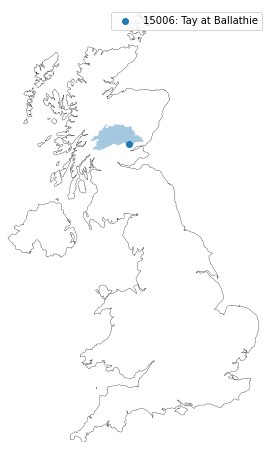

In [6]:
sids = [39001, 54032, 27009, 15006]
sids = [15006]

ax = initialise_gb_spatial_plot()
for i, sid in enumerate(sids):
    name = str(static["gauge_name"].sel(station_id=sid).values)
    name = f"{sid}: {name}"
    gdf.loc[[sid]].plot(alpha=0.4, ax=ax, color=f"C{i}")
    points.loc[[sid]].plot(alpha=1, ax=ax, color=f"C{i}", label=name)

ax.legend()

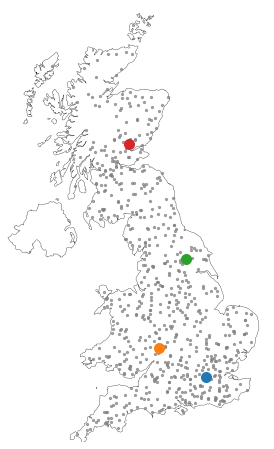

In [7]:
ax = initialise_gb_spatial_plot()
points.plot(ax=ax, color="grey", alpha=0.7, markersize=5)
sids = [39001, 54032, 27009, 15006]
for i, sid in enumerate(sids):
    points.loc[[sid]].plot(alpha=1, ax=ax, color=f"C{i}", label=name, markersize=100)

# Variables

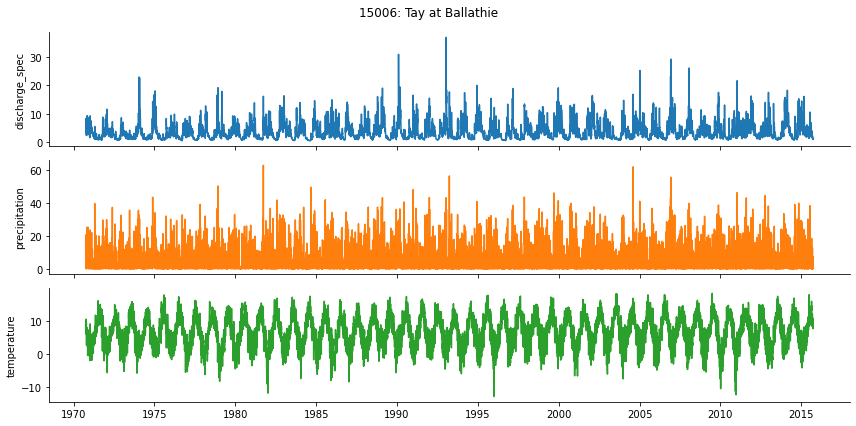

In [8]:
variables = ["discharge_spec", "precipitation", "temperature"]

data = ds.sel(station_id=sid)
f, axs = plt.subplots(len(variables), 1, figsize=(12, 2*len(variables)), sharex=True)
name = str(static["gauge_name"].sel(station_id=sid).values)
name = f"{sid}: {name}"

for ix, var in enumerate(variables):
    ax = axs[ix]
    ax.plot(data.time, data[var], color=f"C{ix}")
    ax.set_ylabel(var)

f.suptitle(name)
plt.tight_layout()
sns.despine()

# Static Variables

In [9]:
from typing import Optional, Any, Dict, List


def plot_context(static: xr.Dataset, variables: List[str], sids: Optional[List[int]] = None) -> Any:
    n = len(variables)
    nrows = n // 2 + (n % 2)
    f, axs = plt.subplots(nrows, 2, figsize=(12, 2*nrows), tight_layout=True)

    for ix, var_ in enumerate(variables):
        ax = axs[np.unravel_index(ix, (nrows, 2))]
        ax.hist(static[var_], color="grey", alpha=0.6, bins=30, density=True)
        ax.set_title(var_)

        if sids is not None:
            for sid in sids:
                ax.axvline(static[var_].sel(station_id=sid))
    return axs

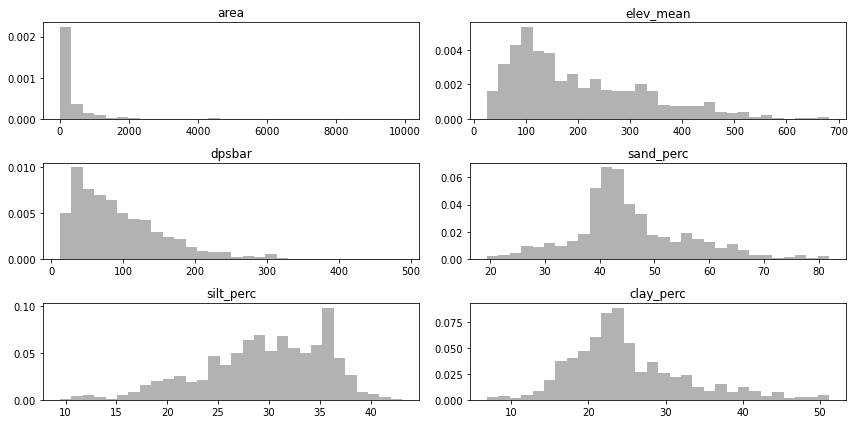

In [10]:
variables = ['area', 'elev_mean', 'dpsbar', 'sand_perc', 'silt_perc', 'clay_perc', 'porosity_hypres', 'conductivity_hypres', 'soil_depth_pelletier', 'dwood_perc', 'ewood_perc', 'crop_perc', 'urban_perc', 'reservoir_cap', 'p_mean', 'pet_mean', 'p_seasonality', 'frac_snow', 'high_prec_freq', 'low_prec_freq', 'high_prec_dur', 'low_prec_dur']
plot_context(static, variables[:6]);

(365,)

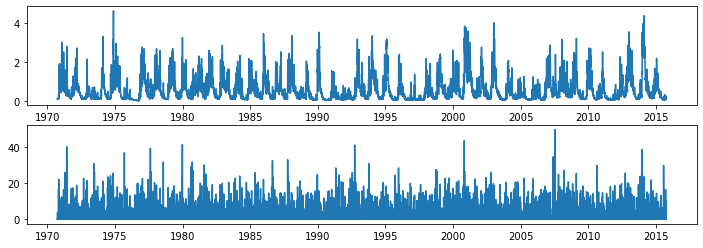

In [11]:
import xarray as xr 
import pandas as pd
from pathlib import Path


# data_dir = Path("path/to/data")

# open the data
dynamic = xr.open_dataset(data_dir / "RUNOFF/ALL_dynamic_ds.nc")
static = xr.open_dataset(data_dir / "camels_static.nc")

# select individual stations, e.g. Thames at Kingston = 39001 is the station code
thames = dynamic.sel(station_id=39001)

# select and plot discharge and precipitation
f, axs = plt.subplots(2, 1, figsize=(12, 4))
axs[0].plot(thames["time"], thames["discharge_spec"])
axs[1].plot(thames["time"], thames["precipitation"])

# convert to pandas (if you prefer)
df = thames.to_dataframe()

np_discharge = dynamic.sel(station_id=39001, time="2007")["discharge_spec"].values
np_discharge.shape


# static

In [12]:
from scripts.geospatial import load_latlon_points, initialise_gb_spatial_plot, plot_spatial_location

In [13]:
fdc = static["slope_fdc"].to_dataframe()
points = load_latlon_points(data_dir=data_dir)
gdf= gpd.GeoDataFrame(fdc.join(points))

<AxesSubplot:>

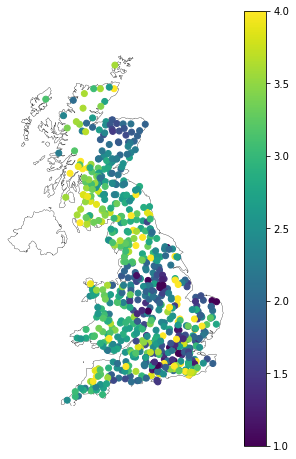

In [14]:
ax = initialise_gb_spatial_plot()
# gdf.plot("slope_fdc", ax=ax, legend=True, vmax=4, vmin=1)
# gdf.plot(ax=ax, markersize=10, color="grey")
gdf.plot("slope_fdc", ax=ax, legend=True, vmax=4, vmin=1)

In [46]:
from scripts.plots import plot_context

# more than 5% missing
missing_data_sids = dynamic.sel(station_id=dynamic["discharge_spec"].isnull().mean(dim="time") > 0.05).station_id.values
subset = static.sel(station_id=static["area"] > static["area"].quantile(q=0.15))
subset = subset.sel(station_id=~np.isin(subset.station_id, missing_data_sids))

metric = 
subset.sel(station_id=subset["slope_fdc"] ==  subset["slope_fdc"].min())

<xarray.Dataset>
Dimensions:                       (station_id: 1)
Coordinates:
  * station_id                    (station_id) int64 39029
    quantile                      float64 0.15
Data variables: (12/146)
    sand_perc                     (station_id) float64 ...
    sand_perc_missing             (station_id) float64 ...
    silt_perc                     (station_id) float64 ...
    silt_perc_missing             (station_id) float64 ...
    clay_perc                     (station_id) float64 ...
    clay_perc_missing             (station_id) float64 ...
    ...                            ...
    frac_mod_perc                 (station_id) float64 ...
    frac_low_perc                 (station_id) float64 ...
    no_gw_perc                    (station_id) float64 ...
    low_nsig_perc                 (station_id) float64 ...
    nsig_low_perc                 (station_id) float64 ...
    log_area                      (station_id) float64 4.074

Text(0.5, 1.0, 'Tilling Bourne at Shalford')

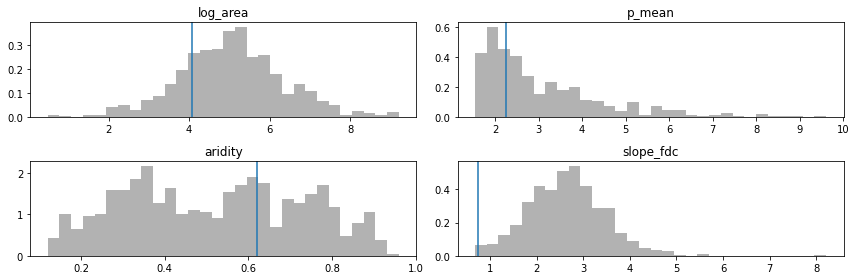

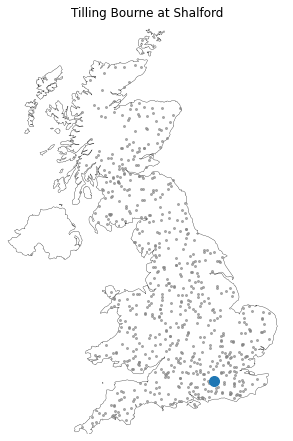

In [66]:
sid = 39029  # 33020
sids = [sid]

static["log_area"] = np.log(static["area"])
plot_context(static=static, sids=sids, variables=["log_area", "p_mean", "aridity", "slope_fdc"]);

plot_spatial_location(sids, points=points)
plt.gca().set_title(str(static.sel(station_id=sid).gauge_name.values))

Text(0.5, 1.0, 'Bottom aridity')

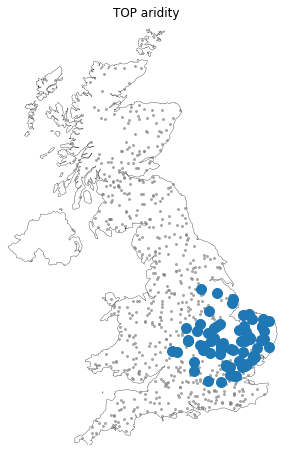

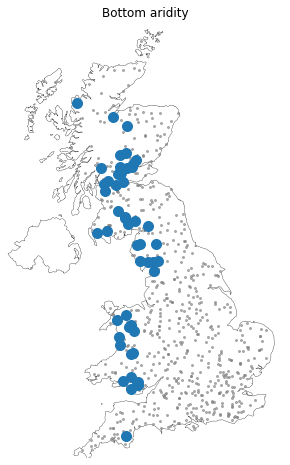

In [65]:
metric = "aridity"
top_sids = subset.sel(station_id=subset[metric] > subset[metric].quantile(q=0.8)).station_id
bottom_sids = subset.sel(station_id=subset[metric] < subset[metric].quantile(q=0.15)).station_id

plot_spatial_location(top_sids, points=points)
plt.gca().set_title(f"TOP {metric}")
plot_spatial_location(bottom_sids, points=points)
plt.gca().set_title(f"Bottom {metric}")

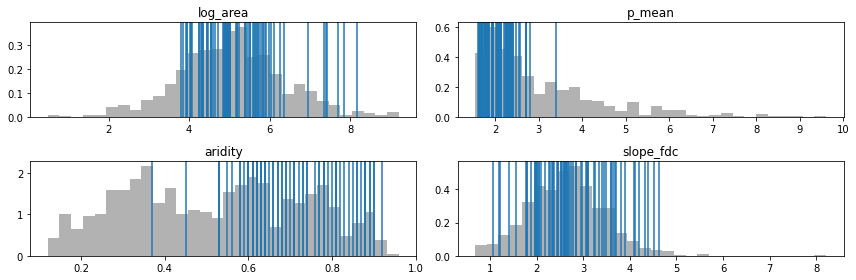

In [63]:
plot_context(static=static, sids=top_sids, variables=["log_area", "p_mean", "aridity", "slope_fdc"]);

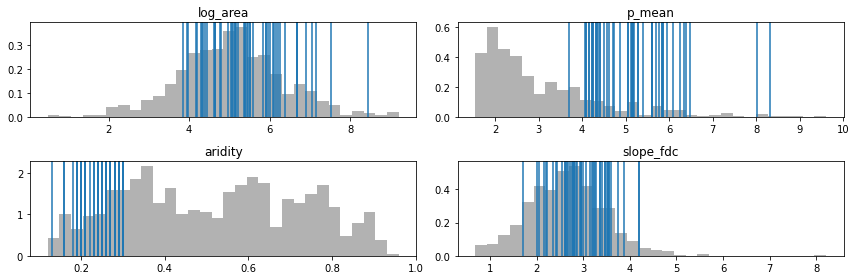

In [70]:
static["mean_discharge"] = dynamic["discharge_spec"].mean(dim="time")
plot_context(static=static, sids=bottom_sids, variables=["log_area", "p_mean", "aridity", "slope_fdc"]);

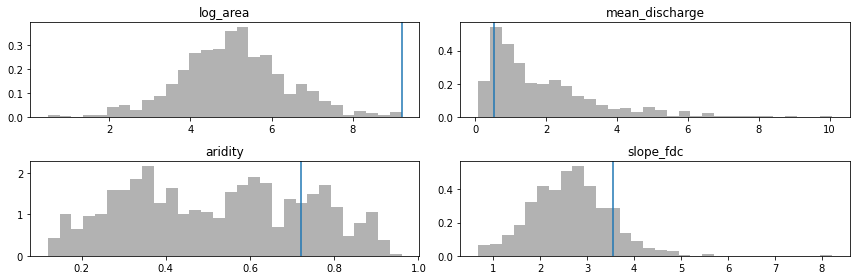

In [72]:
plot_context(static=static, sids=[39001], variables=["log_area", "mean_discharge", "aridity", "slope_fdc"]);

In [69]:
dynamic["discharge_spec"].std()

<xarray.DataArray 'discharge_spec' ()>
array(3.49618407)